# Analysis of Ski Resorts (Snowboarding Sports) around the World
Ski Resorts
Data on ski resorts around the world, including details on location, price, slopes, number of lifts, and seasons for each month in 2022.

Recommended Analysis
- Which countries have the most ski resorts? Are there any groups that stand out?

- How does the ski season vary by location?

- Which resorts have the highest mountain peaks and elevation changes?

- What resorts are best for beginners? What about the experts?

- Resort Ski yang Ramah untuk anak-anak

- Resort Ski yang Cocok untuk Liburan Keluarga

Nama: Roni Antonius Sinabutar

Kelas: SIK A Cakap Data Scientist

Dataset: https://maven-datasets.s3.amazonaws.com/Ski+Resorts/Ski+Resorts.zip

In [1]:
from pyforest import *
import psycopg2
import warnings
warnings.simplefilter("ignore")

In [2]:
# data_bersih = pd.read_csv('C:/Users/ASUS/dataset/resort.csv')

In [3]:
# data_bersih = data_bersih[~data_bersih['Season'].str.contains(',')]

In [4]:
# data_bersih[['Start_Season', 'End_Season']] = data_bersih['Season'].str.split(' - ', expand=True)

In [5]:
# data_bersih = data_bersih.dropna(subset=['Start_Season', 'End_Season'])

In [6]:
# data_bersih = data_bersih.drop(columns=['Season'])

In [7]:
# data_bersih

In [8]:
# data_bersih.to_csv('C:/Users/ASUS/dataset/resort_ril.csv', index=False)

In [9]:
koneksi = psycopg2.connect(
    dbname="Ski_Resorts",
    user="postgres",
    password="admin",
    host="localhost",
    port="5432"
)

In [10]:
sql1 = '''
SELECT *
FROM resorts
'''

In [11]:
df = pd.read_sql_query(sql1, koneksi)

<IPython.core.display.Javascript object>

In [12]:
df.head(5)

,id,resort,latitude,longitude,country,continent,price,highest_point,lowest_point,beginner_slope,...,chair_lifts,gondola_lifts,total_lifts,lift_capacity,child_friendly,snowparks,nightskiing,summer_skiing,start_season,end_season
0,1,Hemsedal,60.928244,8.383487,Norway,Europe,46,1450,620,29,...,6,0,21,22921,Yes,Yes,Yes,No,November,May
1,2,Geilosiden Geilo,60.534526,8.206372,Norway,Europe,44,1178,800,18,...,6,0,24,14225,Yes,Yes,Yes,No,November,April
2,3,Golm,47.057810,9.828167,Austria,Europe,48,2110,650,13,...,4,3,11,16240,Yes,No,No,No,December,April
3,4,Red Mountain Resort-Rossland,49.105520,-117.846280,Canada,North America,60,2075,1185,20,...,5,1,8,9200,Yes,Yes,Yes,No,December,April
4,5,Hafjell,61.230369,10.529014,Norway,Europe,45,1030,195,33,...,3,1,18,21060,Yes,Yes,Yes,No,November,April


In [13]:
df.dtypes

id                      int64
resort                 object
latitude              float64
longitude             float64
country                object
continent              object
price                   int64
highest_point           int64
lowest_point            int64
beginner_slope          int64
intermediate_slope      int64
difficult_slope         int64
total_slope             int64
longest_run             int64
snow_cannons            int64
surface_lifts           int64
chair_lifts             int64
gondola_lifts           int64
total_lifts             int64
lift_capacity           int64
child_friendly         object
snowparks              object
nightskiing            object
summer_skiing          object
start_season           object
end_season             object
dtype: object

1. Which countries have the most ski resorts? Are there any groups that stand out?

In [14]:
sql2 = '''
SELECT country as negara,
COUNT(*) AS total_wisata_ski

FROM resorts
GROUP BY country
ORDER BY total_wisata_ski DESC;
'''

In [15]:
sql_3 = '''
SELECT continent, COUNT(*) AS total_wisata_ski
FROM resorts
GROUP BY continent
ORDER BY total_wisata_ski DESC;
'''

In [16]:
negara_resort = pd.read_sql_query(sql2, koneksi)

<IPython.core.display.Javascript object>

In [110]:
negara_resorts = negara_resort.head(5)
negara_resorts

,negara,total_wisata_ski
0,Austria,81
1,France,75
2,United States,74
3,Switzerland,54
4,Italy,42


In [18]:
negara_resorts_kontinen = pd.read_sql_query(sql_3, koneksi)
negara_resorts_kontinen = negara_resorts_kontinen
negara_resorts_kontinen

<IPython.core.display.Javascript object>

,continent,total_wisata_ski
0,Europe,326
1,North America,93
2,Asia,17
3,Oceania,10
4,South America,7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

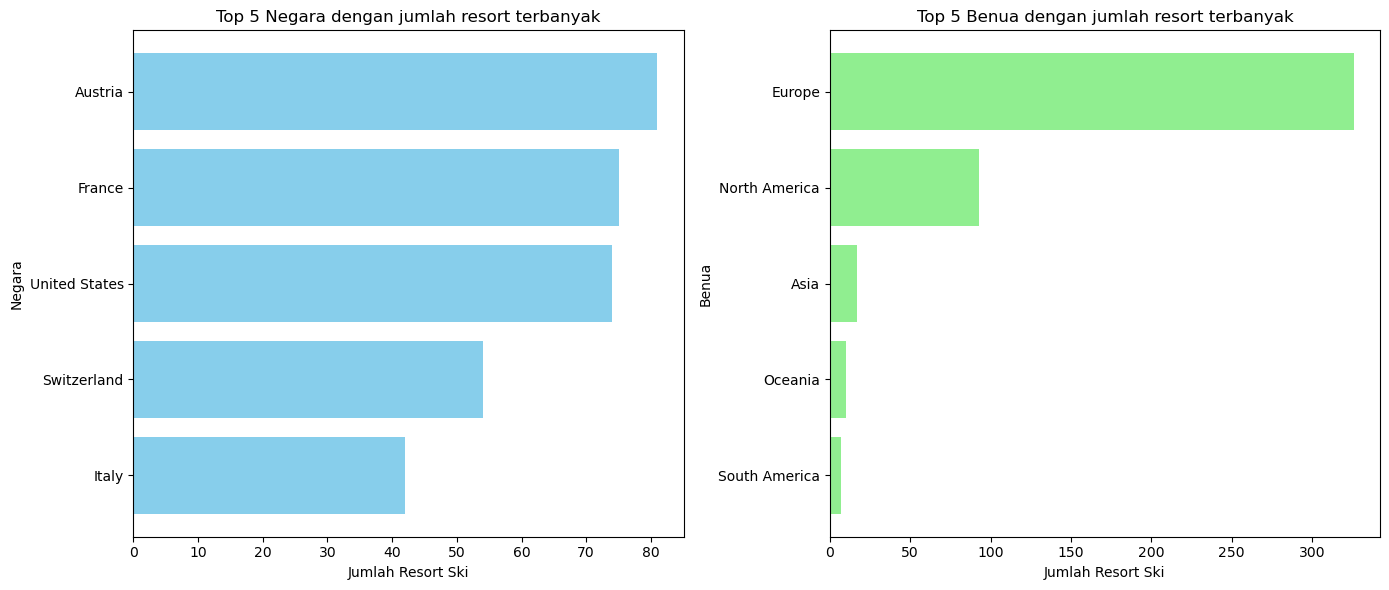

In [111]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) #bagian kiri
plt.barh(negara_resorts['negara'], negara_resorts['total_wisata_ski'], color='skyblue')
plt.xlabel('Jumlah Resort Ski')
plt.ylabel('Negara')
plt.title('Top 5 Negara dengan jumlah resort terbanyak')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2) #bagian kanan

plt.barh(negara_resorts_kontinen['continent'], negara_resorts_kontinen['total_wisata_ski'], color='lightgreen')
plt.xlabel('Jumlah Resort Ski')
plt.ylabel('Benua')
plt.title('Top 5 Benua dengan jumlah resort terbanyak')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


Berdasarkan kueri dengan menggunakan fungsi COUNT dan juga GROUP BY beserta hasil visualisasi yang dihasilkan diatas. Negara Austria, Prancis, dan Amerika itu menjadi negara yang memiliki wisata atau resort olahraga salju atau selancar salju Ski terbanyak di Dunia. Hal ini dibuktikan pada visualisasi jumlah wisata atau resort Ski yang terbanyak itu ada di benua Europa dan North America, dikarenakan benua tersebut memang memiliki 4 musim dan banyaknya apresiasi masyarakat dalam mengikuti olahraga salju tersebut.

2. How does the ski season vary by location? Does the snow cover reflect this?

In [20]:
sql4 = '''
-- Mengidentifikasi musim ski berdasarkan bulan awal dan bulan akhir dari tabel resorts
WITH identified_seasons AS (
    SELECT
        country,
        CASE
            WHEN start_season IN ('November', 'December', 'January') AND end_season IN ('February', 'March', 'April', 'May') THEN 'Winter'
            WHEN start_season IN ('December', 'January', 'February') AND end_season IN ('March', 'April', 'May') THEN 'Late Winter'
            WHEN start_season IN ('November', 'December', 'January', 'February', 'March') AND end_season IN ('April', 'May') THEN 'Early Spring'
            ELSE 'Other'
        END AS ski_season
    FROM
        resorts
),
-- Menghitung jumlah resort untuk setiap ski_season di setiap negara
resort_counts AS (
    SELECT
        country,
        ski_season,
        COUNT(*) AS resort_count
    FROM
        identified_seasons
    GROUP BY
        country, ski_season
)
-- Menampilkan hasil penghitungan
SELECT
    country,
    ski_season,
    resort_count
FROM
    resort_counts;

'''

In [112]:
ski_seasons = pd.read_sql_query(sql4, koneksi)
ski_seasons

<IPython.core.display.Javascript object>

,country,ski_season,resort_count
0,Finland,Winter,2
1,Switzerland,Winter,49
2,United States,Other,4
3,Georgia,Winter,1
4,Japan,Winter,10
5,Czech Republic,Winter,2
6,Italy,Winter,40
7,Argentina,Other,2
8,Ukraine,Winter,1
9,Australia,Other,5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

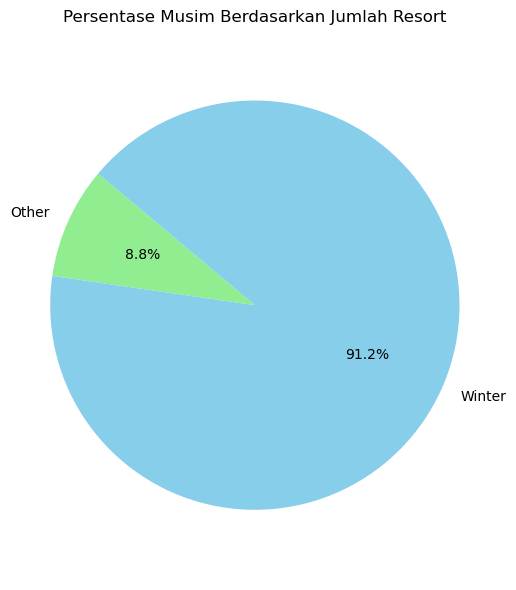

In [55]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1) #bagian kiri
# Pie chart
df_pie = ski_seasons.groupby('ski_season')['resort_count'].sum().reset_index()
labels = df_pie['ski_season']
sizes = df_pie['resort_count']
colors = ['skyblue' if label == 'Winter' else 'lightgreen' for label in labels]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Persentase Musim Berdasarkan Jumlah Resort')
plt.axis('equal')

plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

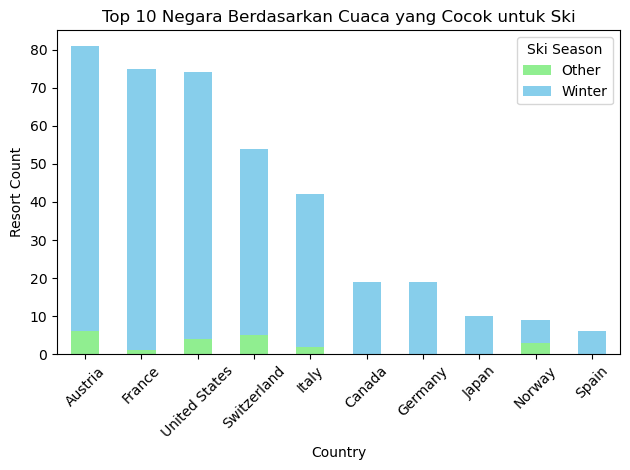

In [106]:
# Bar chart
top_10_countries = ski_seasons.groupby('country')['resort_count'].sum().nlargest(10).index.tolist()
df_top_10 = ski_seasons[ski_seasons['country'].isin(top_10_countries)]
df_top_10_pivot = df_top_10_pivot.loc[top_10_countries]
df_top_10_pivot.plot(kind='bar', stacked=True, color=['lightgreen', 'skyblue'])
plt.title('Top 10 Negara Berdasarkan Cuaca yang Cocok untuk Ski')
plt.xlabel('Country')
plt.ylabel('Resort Count')
plt.xticks(rotation=45)
plt.legend(title='Ski Season')
plt.tight_layout()
plt.show()

Berdasarkan kueri dengan menerapkan sub query dan case when, saya bisa membuat hasil analisis dan visualisasi terhadap bagaimana musim dari olahraga Ski pada beberapa lokasi. Seperti yang ditampilkan pada grafik pie chart bahwa hampir 91.2% olahraga Ski itu diadakan ketika musim Winter atau musim salju. Sisanya itu diadakan ketika musim salju baru mendatang dan baru selesai.

Selain itu negara Austria, Prancis, dan Amerika itu menjadi negara yang paling banyak melaksanakan olahraga Ski pada musim Salju. Sementara negara spain, norway, dan japan menjadi negara yang paling sedikit resort ski dalam yang mungkin dikarenakan persebaran dari lokasi resort ski memang sedikit.

3. Which resorts have the highest mountain peaks and elevation changes?

In [62]:
sql5 = '''
SELECT resort,
highest_point,
lowest_point, 
highest_point - lowest_point AS jarak_elevasi, 
price,
total_lifts,
country,
continent

FROM resorts
ORDER BY jarak_elevasi DESC;
'''

In [64]:
elevasi = pd.read_sql_query(sql5, koneksi)
elevasi.head(5)

<IPython.core.display.Javascript object>

,resort,highest_point,lowest_point,jarak_elevasi,price,total_lifts,country,continent
0,Nendaz (4 Valle?es),3330,821,2509,66,75,Switzerland,Europe
1,Veysonnaz (4 Valle?es),3330,821,2509,66,75,Switzerland,Europe
2,Thyon (4 Valle?es),3330,821,2509,66,75,Switzerland,Europe
3,Verbier (4 Valle?es),3330,821,2509,66,75,Switzerland,Europe
4,Alpe d'Huez,3330,1125,2205,51,68,France,Europe


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

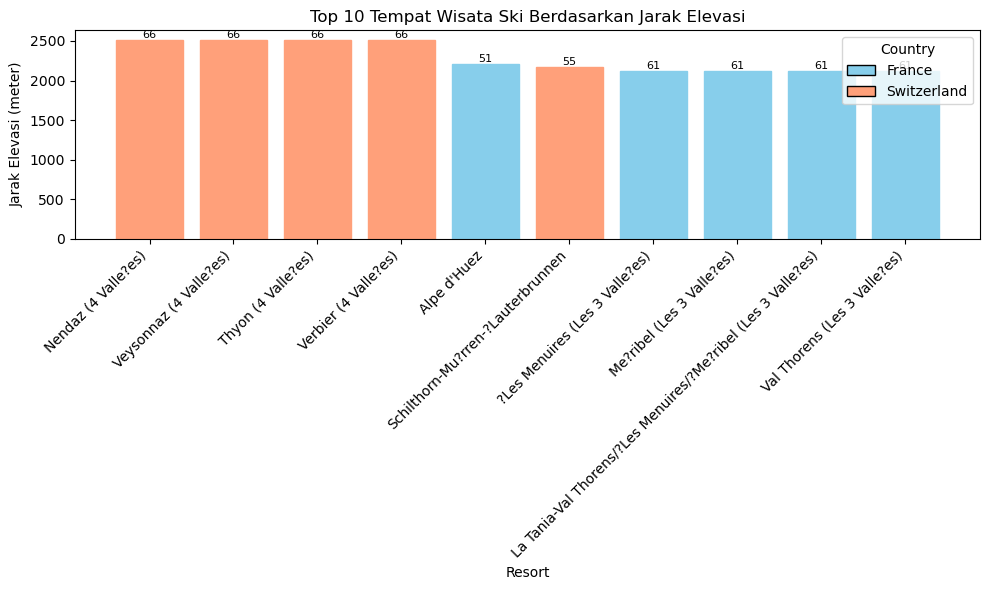

In [78]:
top_10_resorts = elevasi.head(10)

color_mapping = {'France': 'skyblue', 'Switzerland': 'lightsalmon'}

colors = top_10_resorts['country'].apply(lambda x: color_mapping.get(x, 'lightgrey'))

plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_resorts['resort'], top_10_resorts['jarak_elevasi'], color=colors)

for bar, price in zip(bars, top_10_resorts['price']):
    bar_x = bar.get_x() + bar.get_width() / 2
    bar_y = bar.get_height() + 0.05
    plt.text(bar_x, bar_y, str(price), ha='center', va='bottom', color='black', fontsize=8)
    bar.set_color(color_mapping.get(top_10_resorts['country'][bars.index(bar)], 'lightgrey'))

plt.title('Top 10 Tempat Wisata Ski Berdasarkan Jarak Elevasi')
plt.xlabel('Resort')
plt.ylabel('Jarak Elevasi (meter)')

plt.legend(handles=[plt.Rectangle((0,0),1,1, color='skyblue', ec="k", label='France'),
                    plt.Rectangle((0,0),1,1, color='lightsalmon', ec="k", label='Switzerland')],
           title='Country')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Dengan memilih beberapa fitur untuk mencari resort ski manakah yang memiliki tempat wisata yang paling tinggi lokasinya dan juga jarak elevasi yang merupkan selisih lokasi tertinggi dan terbawah dari suatu resort.

Sehingga diketahui bahwa lokasi resort berdasarkan jarak elevasi pada resort Nendaz, Veysonnaz, Thyon, dan Verbier itu memiliki jarak elevasi paling besar yaitu sekitar 2,5 Kilometer. Artinya keempat resort tersebut mempunyai area yang cukup luas dalam aktivitas olahraga saljunya. Selain itu juga keempat resort tersebut sama-sama memasang harga $66.

4. What resorts are best for beginners? What about the experts?

In [81]:
sql6 = '''
SELECT resort,
beginner_slope,
intermediate_slope,
difficult_slope,
price,
total_lifts

FROM resorts;
'''

In [82]:
slope = pd.read_sql_query(sql6, koneksi)
slope.head(5)

<IPython.core.display.Javascript object>

,resort,beginner_slope,intermediate_slope,difficult_slope,price,total_lifts
0,Hemsedal,29,10,4,46,21
1,Geilosiden Geilo,18,12,4,44,24
2,Golm,13,12,1,48,11
3,Red Mountain Resort-Rossland,20,50,50,60,8
4,Hafjell,33,7,4,45,18


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

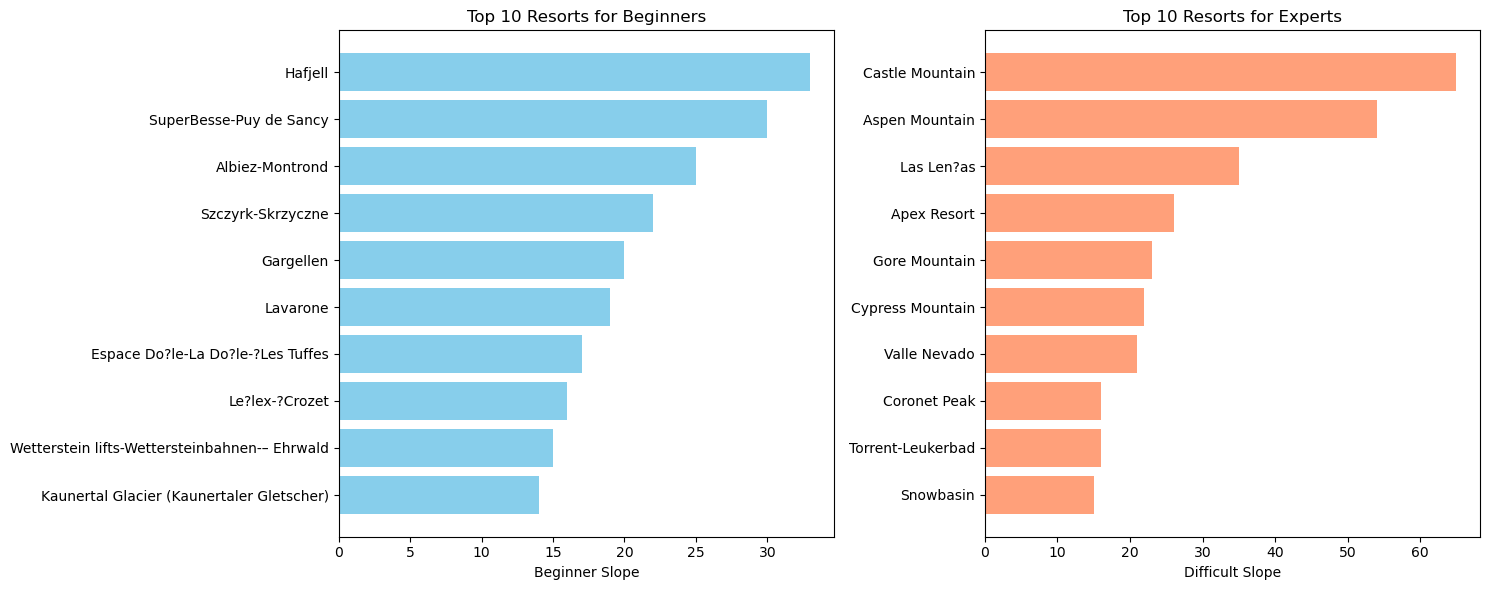

In [86]:
top_10_beginner = slope[(slope['beginner_slope'] > 0) & (slope['intermediate_slope'] < 10) & (slope['difficult_slope'] < 5)].nlargest(10, 'beginner_slope')

top_10_expert = slope[(slope['difficult_slope'] > 0) & (slope['beginner_slope'] < 10) & (slope['intermediate_slope'] < 50)].nlargest(10, 'difficult_slope')

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
bars_beginner = plt.barh(top_10_beginner['resort'], top_10_beginner['beginner_slope'], color='skyblue')
plt.xlabel('Beginner Slope')
plt.title('Top 10 Resorts for Beginners')
plt.gca().invert_yaxis() 

plt.subplot(1, 2, 2)
bars_expert = plt.barh(top_10_expert['resort'], top_10_expert['difficult_slope'], color='lightsalmon')
plt.xlabel('Difficult Slope')
plt.title('Top 10 Resorts for Experts')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

Untuk mencari resort mana yang paling cocok untuk pemula dan yang mahir terhadap data dari tabel 'resorts' adalah dengan memanggil datanya seperti biasa. Lalu menentukan beberapa syarat untuk resort yang cocok untuk pemula yaitu harus memiliki lintasan pemula yang banyak. Sedangkan untuk menentukan resort yang cocok terhadap orang yang mahir itu harus memiliki lintasan yang sulit cukup banyak. Dimana resort Hafjell merupakan resort paling cocok untuk pemula dan resort Castle Mountain itu cocok untuk expert.

5. Perbandingan Resor Ski Ramah Anak: Lereng atau rute Pemula, Lift, dan Meriam Salju Berdasarkan Negara

In [87]:
sql7 = '''
SELECT country, AVG(beginner_slope) as beginner_slope,
       AVG(price) AS average_price,
       AVG(gondola_lifts) AS average_gondola_lifts,
       AVG(chair_lifts + surface_lifts) AS average_total_lifts,
       AVG(snow_cannons) AS average_snow_cannons
       
FROM resorts

WHERE child_friendly = 'Yes' AND beginner_slope > 30
GROUP BY country;

'''

In [89]:
ramah_anak = pd.read_sql_query(sql7, koneksi)
ramah_anak.head(5)

<IPython.core.display.Javascript object>

,country,beginner_slope,average_price,average_gondola_lifts,average_total_lifts,average_snow_cannons
0,Switzerland,64.444444,58.444444,8.388889,28.444444,104.277778
1,Italy,57.083333,47.250000,7.750000,39.250000,208.416667
2,Sweden,45.000000,45.000000,4.000000,32.000000,0.000000
3,Norway,33.000000,45.500000,0.500000,26.500000,284.000000
4,Austria,87.950000,51.400000,12.550000,57.300000,825.750000


In [117]:
top_beginner_slope = ramah_anak.nlargest(5, 'beginner_slope')

top_gondola_lifts = ramah_anak.nlargest(5, 'average_gondola_lifts')
top_total_lifts = ramah_anak.nlargest(5, 'average_total_lifts')
top_snow_cannons = ramah_anak.nlargest(5, 'average_snow_cannons')
top_snow_cannons

,country,beginner_slope,average_price,average_gondola_lifts,average_total_lifts,average_snow_cannons
10,Andorra,82.750000,44.500000,6.250000,55.500000,848.000000
4,Austria,87.950000,51.400000,12.550000,57.300000,825.750000
7,France,123.195122,43.365854,9.536585,59.390244,663.585366
6,Spain,57.400000,45.600000,1.000000,24.600000,485.800000
3,Norway,33.000000,45.500000,0.500000,26.500000,284.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

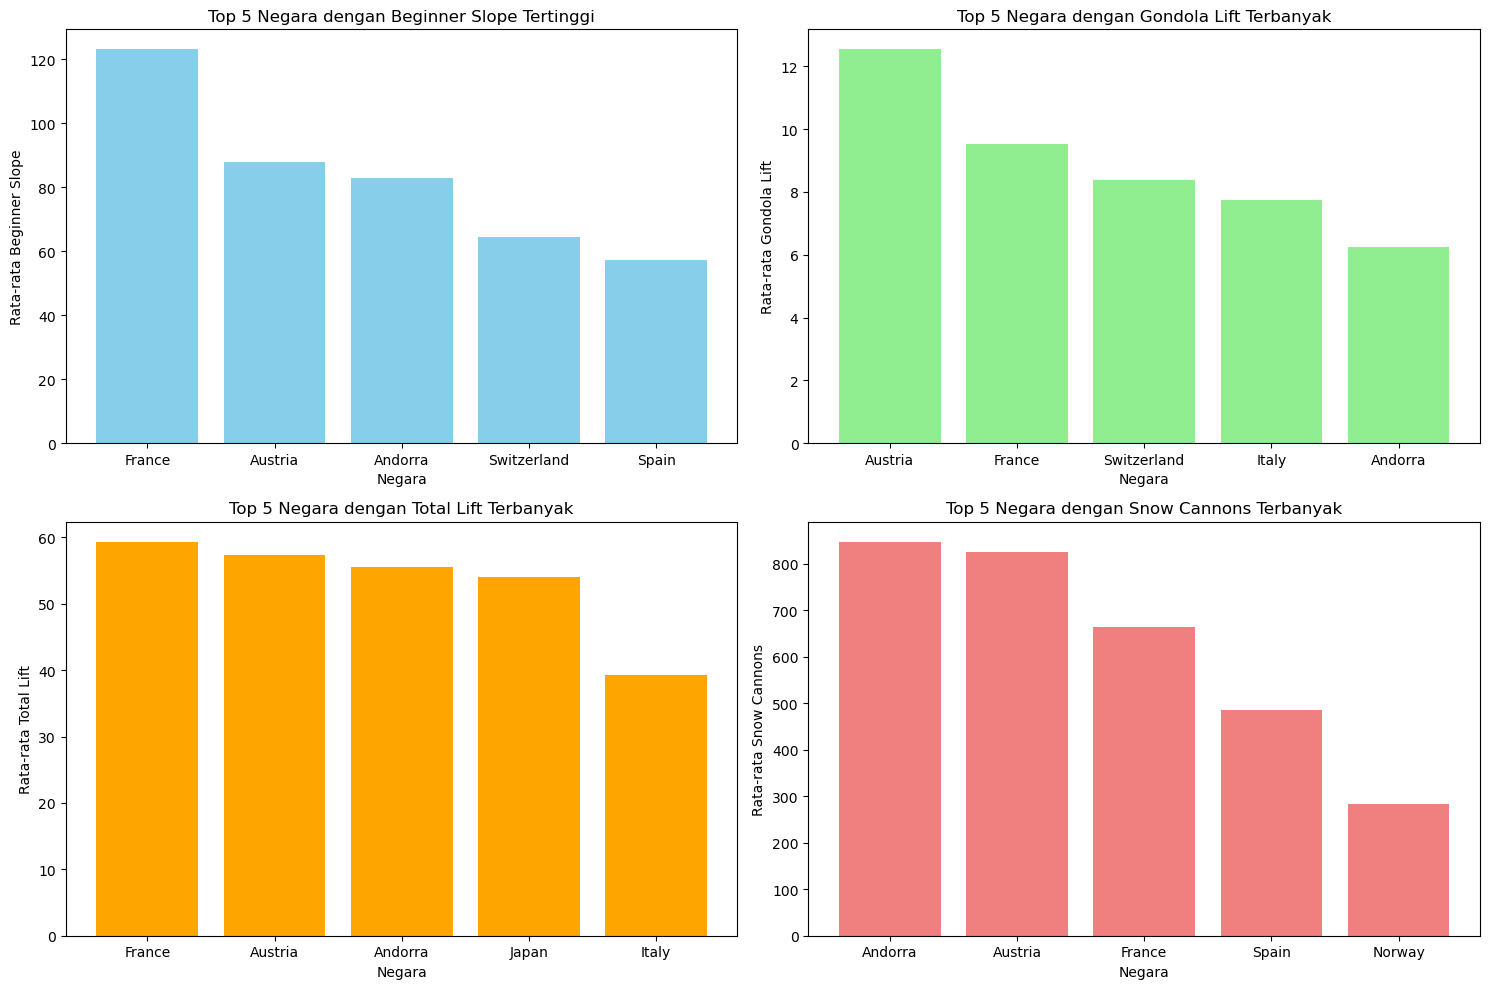

In [91]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.bar(top_beginner_slope['country'], top_beginner_slope['beginner_slope'], color='skyblue')
plt.title('Top 5 Negara dengan Beginner Slope Tertinggi')
plt.xlabel('Negara')
plt.ylabel('Rata-rata Beginner Slope')

plt.subplot(2, 2, 2)
plt.bar(top_gondola_lifts['country'], top_gondola_lifts['average_gondola_lifts'], color='lightgreen')
plt.title('Top 5 Negara dengan Gondola Lift Terbanyak')
plt.xlabel('Negara')
plt.ylabel('Rata-rata Gondola Lift')

plt.subplot(2, 2, 3)
plt.bar(top_total_lifts['country'], top_total_lifts['average_total_lifts'], color='orange')
plt.title('Top 5 Negara dengan Total Lift Terbanyak')
plt.xlabel('Negara')
plt.ylabel('Rata-rata Total Lift')

plt.subplot(2, 2, 4)
plt.bar(top_snow_cannons['country'], top_snow_cannons['average_snow_cannons'], color='lightcoral')
plt.title('Top 5 Negara dengan Snow Cannons Terbanyak')
plt.xlabel('Negara')
plt.ylabel('Rata-rata Snow Cannons')

plt.tight_layout()
plt.show()

Untuk mencari resor yang sangat cocok untuk anak-anak adalah dengan menggunakan data terbaik dari banyaknya lintasan pemula, banyaknya wahana gondola, banyaknya lift dikarenakan adanya lift akan membuat anak-anak menjadi aman dalam mendaki, dan seberapa banyak mesin pembuat salju untuk tujuan bermain.

Sehingga diketahui negara Prancis itu memiliki lintasan pemula terbanyak. Negara Austria memiliki wahana gondola salju terbanyak. Negara Prancis memiliki jumlah lift terbanyak. Juga negara Andorra memiliki jumlah mesin pembuat salju terbanyak. Sehingga berdasarkan analisis dapat ditentukan bahwa negara Austria lalu negara Prancis menjadi negara yang paling ramah untuk anak-anak mengikuti olahraga salju ini.

6. Resort Ski yang Cocok untuk Liburan Keluarga

In [92]:
sql8 = '''
SELECT resort, country, child_friendly, snowparks, nightskiing, summer_skiing,
       price, total_lifts, longest_run, total_slope
       
FROM resorts

WHERE (child_friendly = 'Yes') AND 
      ((snowparks = 'Yes' AND nightskiing = 'Yes' AND summer_skiing = 'Yes') OR
       (snowparks = 'Yes' AND nightskiing = 'Yes' AND summer_skiing = 'No') OR
       (snowparks = 'Yes' AND nightskiing = 'No' AND summer_skiing = 'Yes') OR
       (snowparks = 'No' AND nightskiing = 'Yes' AND summer_skiing = 'Yes'))
      AND (total_slope > 200);

'''

In [93]:
liburan = pd.read_sql_query(sql8, koneksi)
liburan.head()

<IPython.core.display.Javascript object>

,resort,country,child_friendly,snowparks,nightskiing,summer_skiing,price,total_lifts,longest_run,total_slope
0,Les Gets (Les Portes du Soleil),France,Yes,Yes,Yes,No,51,174,0,580
1,Park City,United States,Yes,Yes,Yes,No,97,41,4,250
2,Saalbach Hinterglemm Leogang Fieberbrunn (Skic...,Austria,Yes,Yes,Yes,No,53,71,7,270
3,Grandvalira – Pas de la Casa/?Grau Roig/?Solde...,Andorra,Yes,Yes,Yes,No,47,72,6,210
4,Avoriaz (Les Portes du Soleil),France,Yes,Yes,Yes,No,51,174,0,580


In [121]:
top_expensive_resorts = liburan.nlargest(5, 'price')
top_lift_resorts = liburan.nlargest(5, 'total_lifts')
top_longest_run_resorts = liburan.nlargest(5, 'longest_run')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

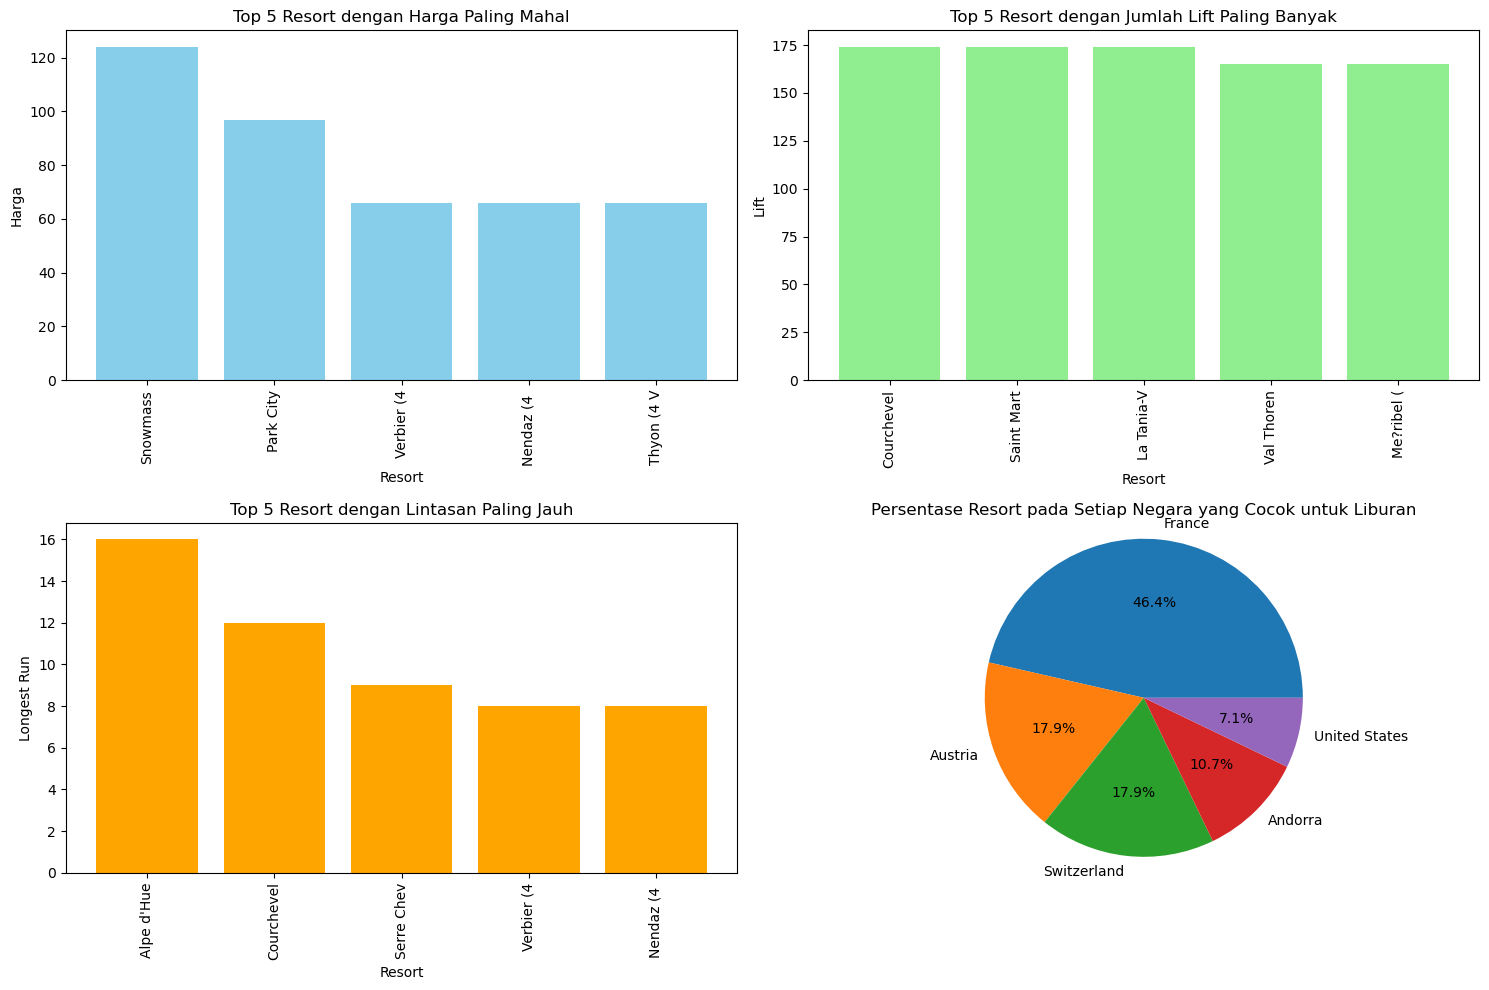

In [105]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.bar(top_expensive_resorts['resort'], top_expensive_resorts['price'], color='skyblue')
plt.title('Top 5 Resort dengan Harga Paling Mahal')
plt.xlabel('Resort')
plt.ylabel('Harga')
plt.xticks(rotation=90)
plt.gca().set_xticklabels([text[:10] for text in top_expensive_resorts['resort']], fontsize=10)

plt.subplot(2, 2, 2)
plt.bar(top_lift_resorts['resort'], top_lift_resorts['total_lifts'], color='lightgreen')
plt.title('Top 5 Resort dengan Jumlah Lift Paling Banyak')
plt.xlabel('Resort')
plt.ylabel('Lift')
plt.xticks(rotation=90)
plt.gca().set_xticklabels([text[:10] for text in top_total_slope_resorts['resort']], fontsize=10)

plt.subplot(2, 2, 3)
plt.bar(top_longest_run_resorts['resort'], top_longest_run_resorts['longest_run'], color='orange')
plt.title('Top 5 Resort dengan Lintasan Paling Jauh')
plt.xlabel('Resort')
plt.ylabel('Longest Run')
plt.xticks(rotation=90)
plt.gca().set_xticklabels([text[:10] for text in top_longest_run_resorts['resort']], fontsize=10)  # Batasi ke 10 kata

plt.subplot(2, 2, 4)
country_count = liburan['country'].value_counts()
plt.pie(country_count, labels=country_count.index, autopct='%1.1f%%')
plt.title('Persentase Resort pada Setiap Negara yang Cocok untuk Liburan')
plt.axis('equal')

plt.tight_layout()
plt.show()

In [122]:
country_count = liburan['country'].value_counts()
country_count

country
France           13
Austria           5
Switzerland       5
Andorra           3
United States     2
Name: count, dtype: int64

Untuk menentukan suatu resort ski yang paling cocok untuk liburan bersama keluarga adalah dengan menggunakan data yang berkaitan dengan liburan seperti fitur data child_friendly, snowparks, nightskiing, dan summer_skiing. Berdasarkan keempat fitur tersebut child_friendly haruslah 'Yes' atau tersedia untuk setiap resort. Lalu dari ketiga fitur seperti snowparks, nightskiing, dan summer_skiing itu diwajibkan minimal 2 fitur itu 'Yes' atau harus tersedia pada suatu resort.

Sehingga berdasarkan hasil analisis dapat diketahui bahwa Resort Ski khusus liburan dengan harga tiket paling mahal yaitu pada resort bernama Snowmass. Lalu untuk resort Ski dengan lintasan paling jauh itu dimiliki oleh 'Alpe d'Hue'. Dimana hampir 50% resort di Dunia yang cocok untuk liburan keluarga itu berada di negara Prancis.